In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Resistenza a Compressione del Calcestruzzo

**Si vuole calibrare un modello empirico per la resistenza del calcestruzzo**

<center>
<img src="assets/concrete.jpg" width="45%"/>
</center>

* Una dataset con misure sperimentali è nel file `concrete.csv`, nella cartella `data`
* Si tratta di dati pubblici dal [repository dell'Università della Californi, Irvine](https://archive.ics.uci.edu/ml/datasets.php)

## Esercizio: Resistenza a Compressione del Calcestruzzo

**Si proceda al caricamento dei dati**

* Allo scopo, si utilizzi la funzione `example.analyze.read_csv`
* Si stampi quindi l'intestazione del file (nomi delle colonne)
* ...E le prime 5 righe della tabella

In [7]:
import os
from example import analyze

fname = os.path.join('data', 'concrete.csv')
data, header = analyze.read_csv(fname)
print(header)
print(data[:5, :])

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals)']
[[ 540.      0.      0.    162.      2.5  1040.    676.     28.     79.99]
 [ 540.      0.      0.    162.      2.5  1055.    676.     28.     61.89]
 [ 332.5   142.5     0.    228.      0.    932.    594.    270.     40.27]
 [ 332.5   142.5     0.    228.      0.    932.    594.    365.     41.05]
 [ 198.6   132.4     0.    192.      0.    978.4   825.5   360.     44.3 ]]


## Esercizio: Resistenza a Compressione del Calcestruzzo

**Si osservino mediante grafici di dispersione le relazioni tra ingressi ed uscite**

Il dataset considerato ha più di una variabile di ingresso

* L'ultima colonna rappresenta l'uscita
* Le prime colonne rappresentano gli ingressi

Si consiglia di utilizzare un ciclo per iterare sulle prime colonne

* Ad ogni iterazione può essere costruito un grafico di dispersione

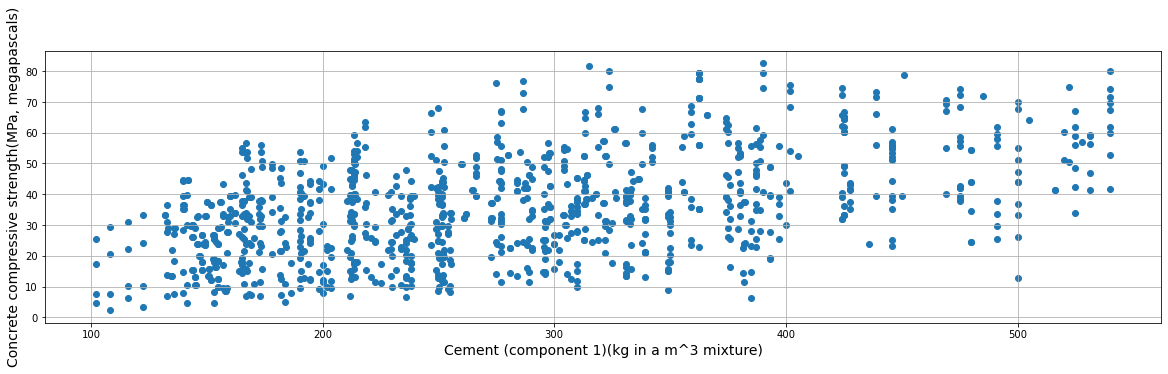

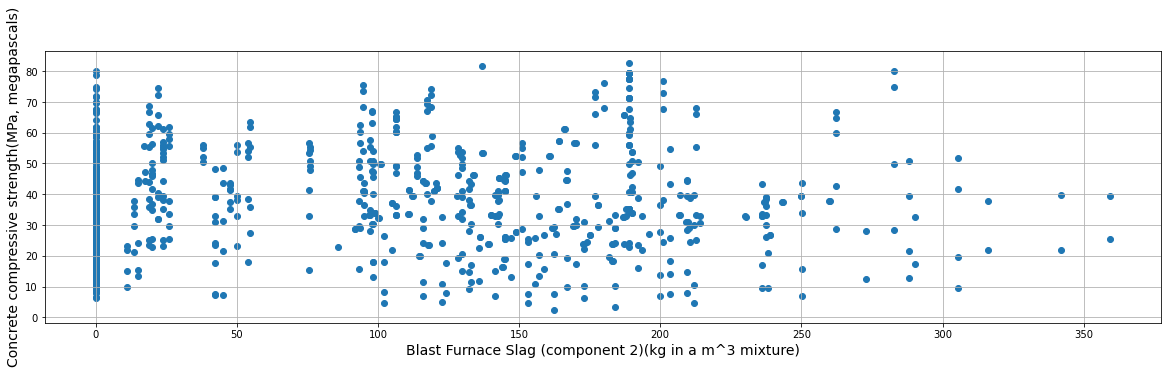

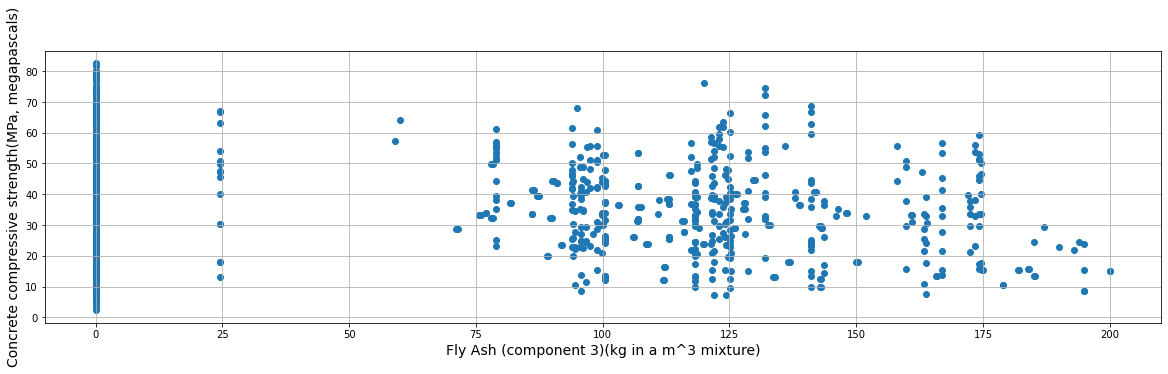

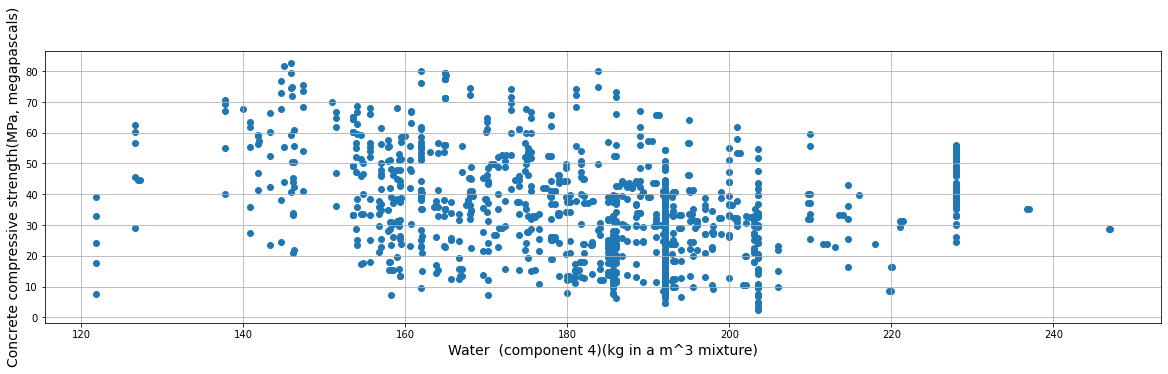

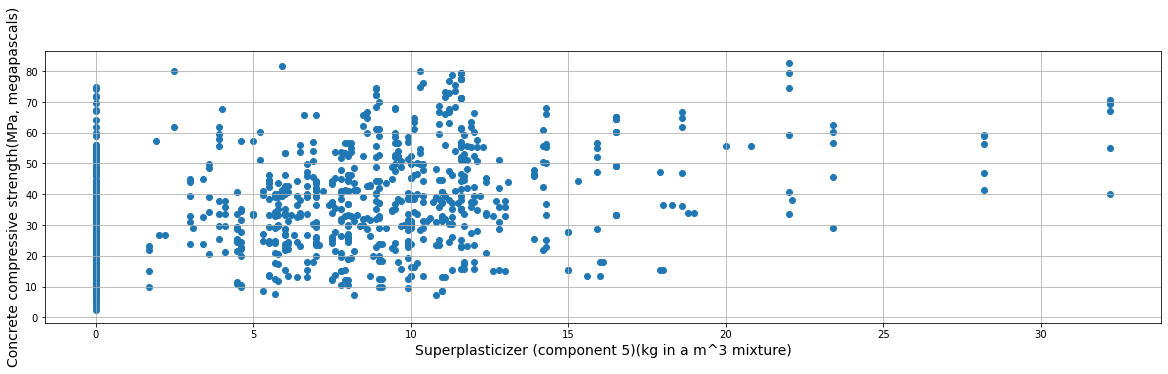

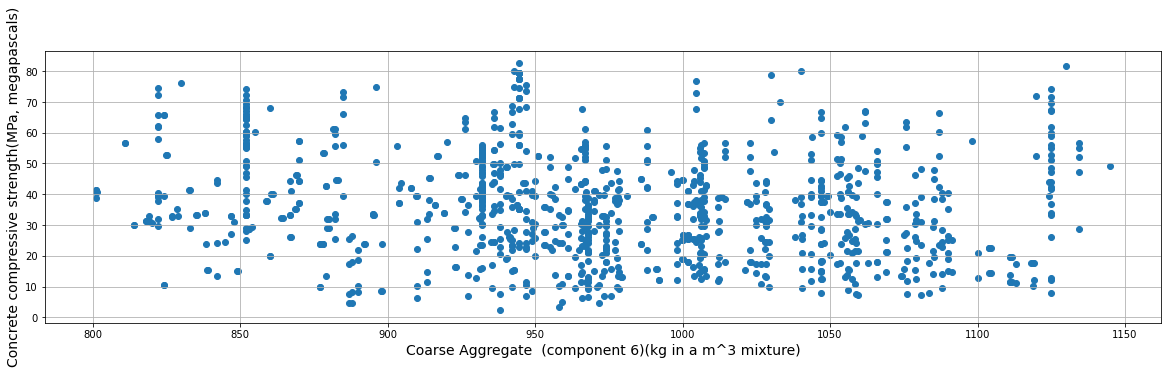

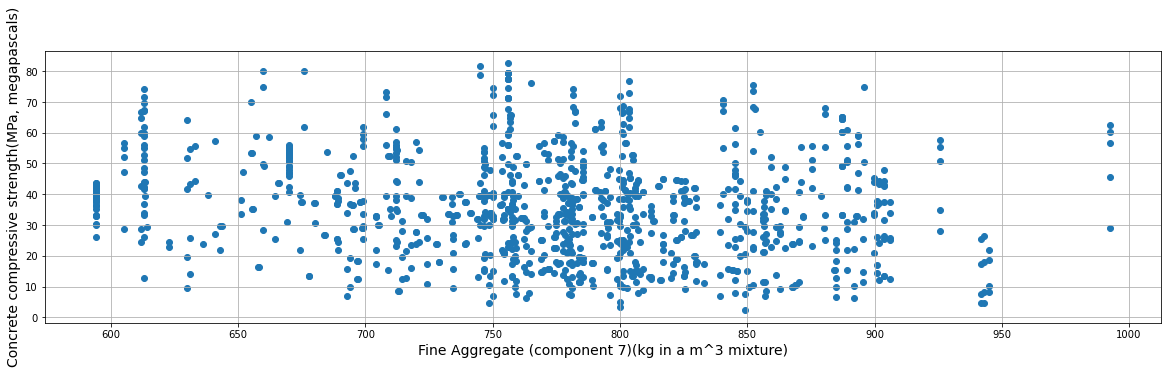

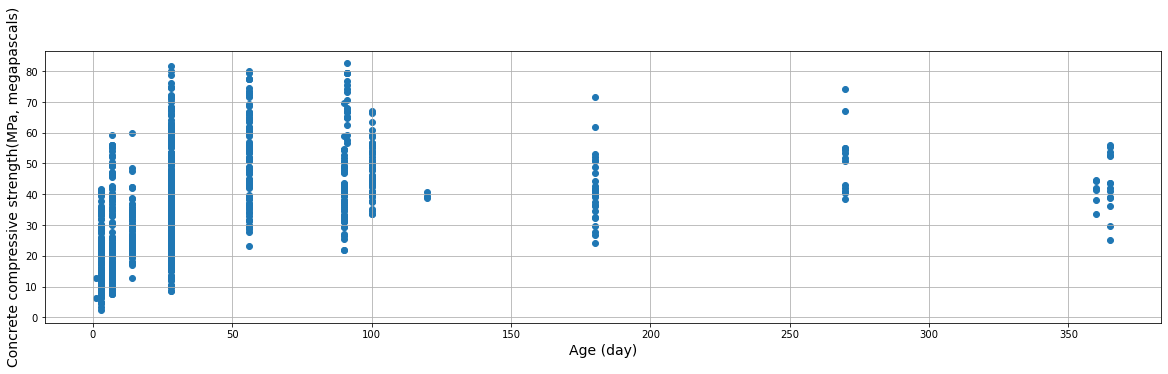

In [9]:
in_cols = [data[:, i] for i in range(len(header)-1)]
out_col = data[:, -1]

for col, hdr in zip(in_cols, header[:-1]):
    analyze.scatter(col, out_col, xlabel=hdr, ylabel=header[-1], figsize=(20, 5))

## Esercizio: Resistenza a Compressione del Calcestruzzo

**Si calibri un modello mediate il metodo dei minimi quadrati**

Il modello deve essere nella forma:

$$
f(x_i) = \sum_{j = 0}^{n-1} \alpha_j x_{i,j}
$$

Dove:

* $j$ indica l'indice di una delle colonne di ingresso
* $i$ indica l'indice di un esempio (mostrato solo per chiarezza)

Intuitivamente, il modello è una sommma pesata dei valori degli ingressi

* Per la calibrazione si utilizzi `example.analyze.fit`
* Si stampino i valori dei coefficienti e del SSE

In [10]:
alpha, sse = analyze.fit(in_cols, out_col)

print(f'SSE: {sse:.3f}')
for h, v in zip(header, alpha):
    print(f'Coefficiente per "{h}": {v:.3f}')

SSE: 110496.441
Coefficiente per "Cement (component 1)(kg in a m^3 mixture)": 0.113
Coefficiente per "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": 0.096
Coefficiente per "Fly Ash (component 3)(kg in a m^3 mixture)": 0.079
Coefficiente per "Water  (component 4)(kg in a m^3 mixture)": -0.182
Coefficiente per "Superplasticizer (component 5)(kg in a m^3 mixture)": 0.265
Coefficiente per "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": 0.010
Coefficiente per "Fine Aggregate (component 7)(kg in a m^3 mixture)": 0.011
Coefficiente per "Age (day)": 0.114


## Esercizio: Resistenza a Compressione del Calcestruzzo

**Si osservi la qualità delle previsioni mediante un grafico di dispersione**

* Si riportino i valori misurati sull'asse delle ascisse
* ...Ed i valori stimati dal modello sull'asse delle ordinate

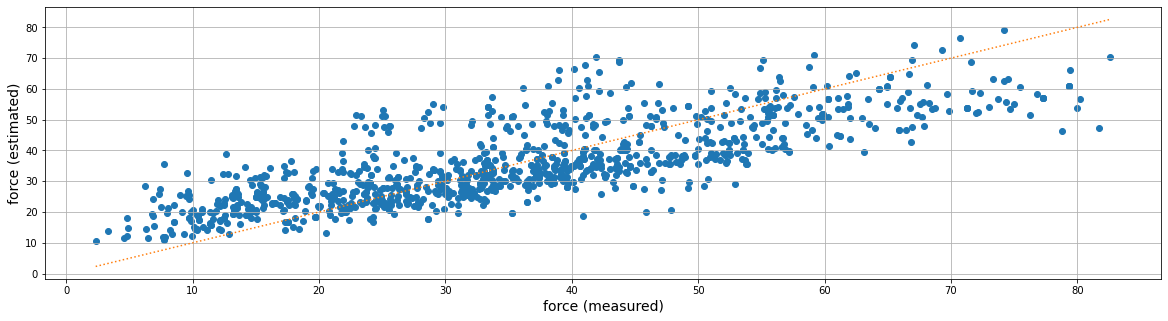

In [11]:
import numpy as np
yp = sum(col * v for col, v in zip(in_cols, alpha))

analyze.scatter(out_col, yp, xlabel='force (measured)', ylabel='force (estimated)', figsize=(20, 5), add_bisector=True)